In [ ]:
import pandas as pd

train = pd.read_csv("C:\\Users\\tkdwl\\Downloads\\train.csv") 
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  minute      10886 non-

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


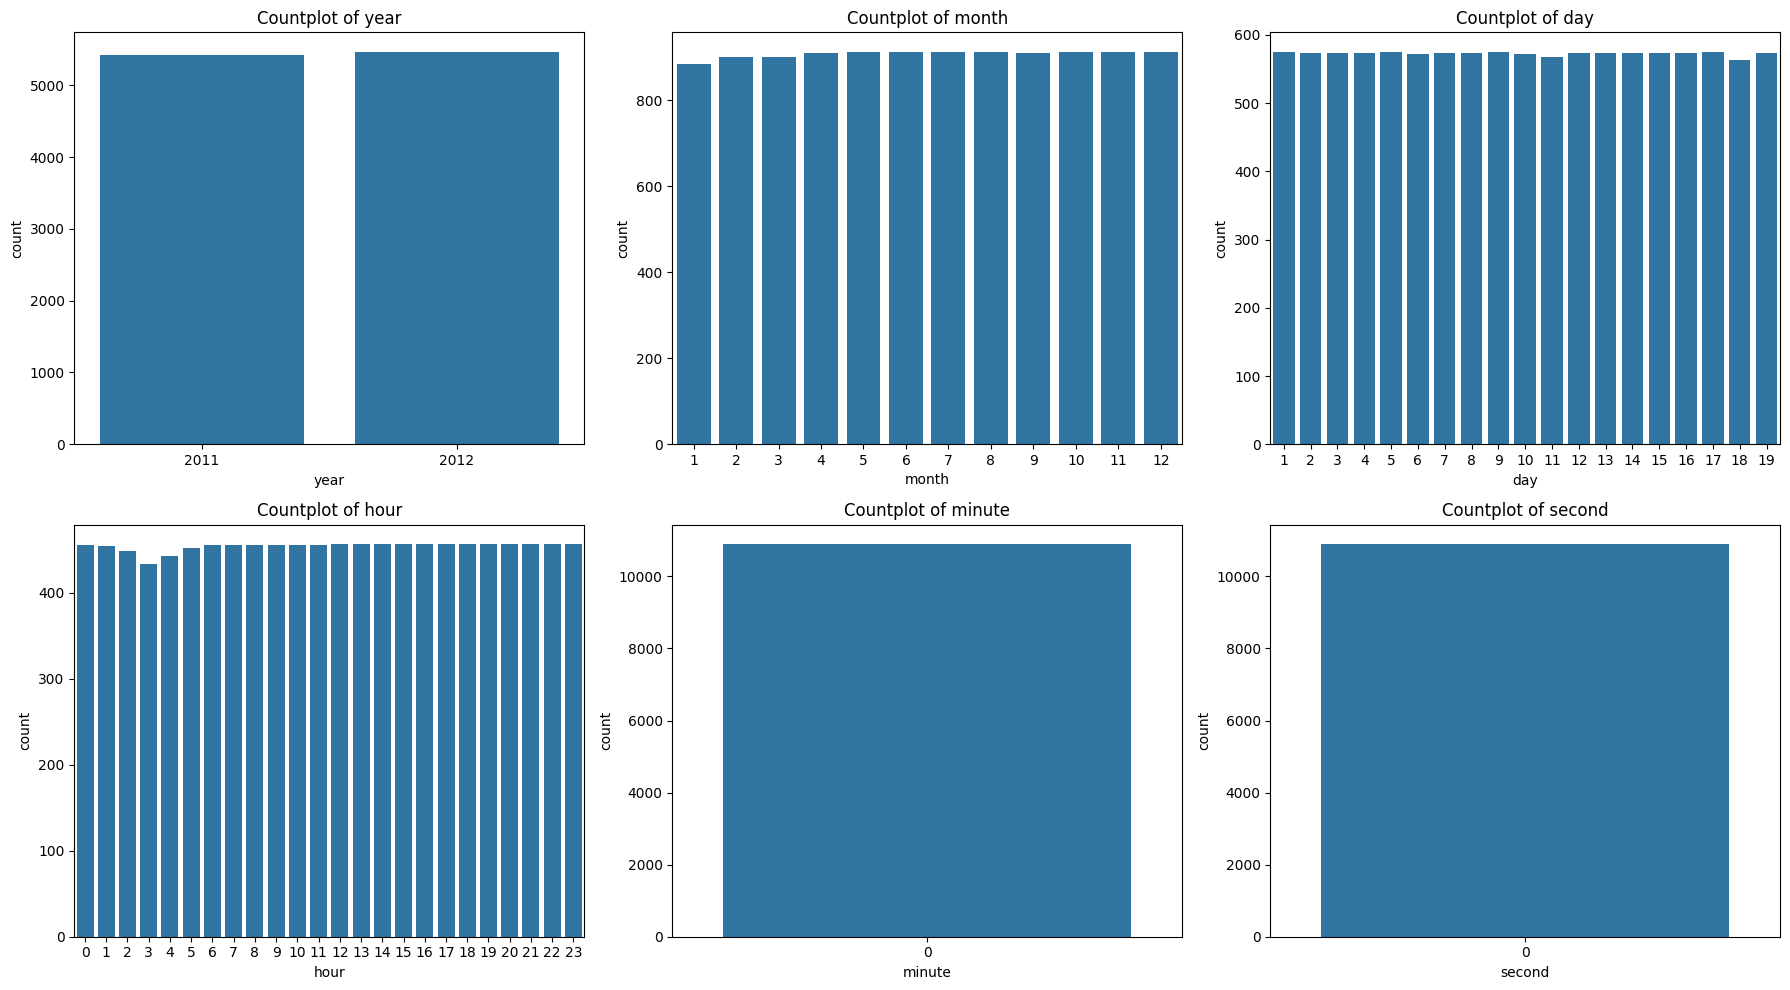

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
cols = ['year', 'month', 'day', 'hour', 'minute', 'second']
for ax, col in zip(axs.flatten(), cols):
    sns.countplot(x=col, data=train, ax=ax)
    ax.set_title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

In [7]:
features = ['year', 'month', 'day', 'hour', 'temp', 'humidity', 'windspeed']
X = train[features]
y = train['count']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 19961.901814435492
RMSE: 141.28659460272758


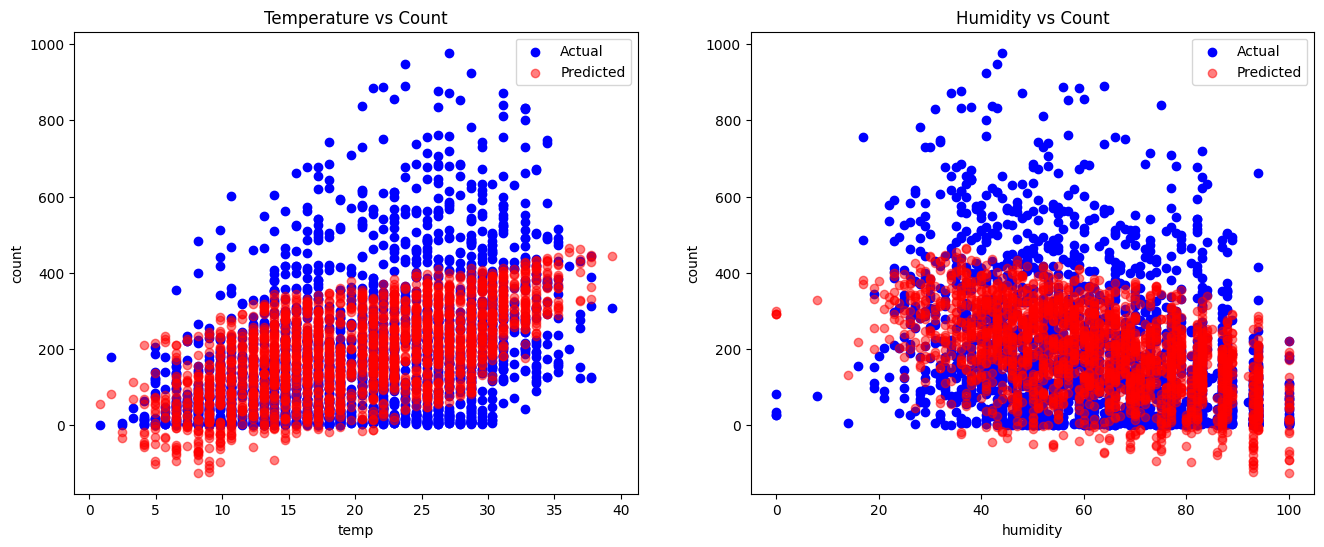

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# temp vs count 시각화
axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

# humidity vs count 시각화
axs[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()
#ss